importing Jupyter notebook from preprocessing.ipynb


<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


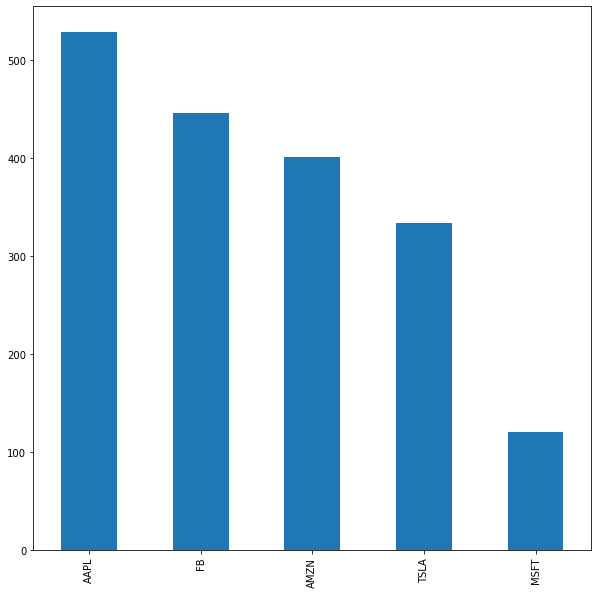

In [1]:
import os
import pandas as pd
import numpy as np  
import re
import nltk 
import matplotlib.pyplot as plt
import import_ipynb
from preprocessing import params
import statsmodels.api as sm

In [2]:
AAPL = pd.read_csv(r'C:\Users\kozyr\Downloads\AAPL_val')
News = pd.read_csv('News')

In [3]:
AAPL = AAPL.drop(AAPL.columns[0], axis = 1)
AAPL['start'] = pd.to_datetime(AAPL['start'])
AAPL['end'] = pd.to_datetime(AAPL['end'])
AAPL['time_tz'] = pd.to_datetime(AAPL['time_tz'])
AAPL['hour'] = AAPL['start'].apply(lambda x: x.hour)
AAPL = AAPL[(AAPL['hour'] > 8) & (AAPL['hour'] < 15)]

News = News.drop(News.columns[0], axis = 1)
News['start'] = pd.to_datetime(News['start'])
News['end'] = pd.to_datetime(News['end'])
News['time_tz'] = pd.to_datetime(News['time_tz'])

News = News.append(AAPL)

584
        Article  time_tz  valid  start  end  CAR  hour  class  Negative  \
ticker                                                                    
AAPL        166      166    166    166  166  166   166    166       166   
AMZN        128      128    128    128  128  128   128      0       128   
FB          175      175    175    175  175  175   175      0       175   
MSFT         29       29     29     29   29   29    29      0        29   
TSLA         86       86     86     86   86   86    86      0        86   

        Neutral  Positive  Sentiment  Score  Words  
ticker                                              
AAPL        166       166        166    166    166  
AMZN        128       128        128    128    128  
FB          175       175        175    175    175  
MSFT         29        29         29     29     29  
TSLA         86        86         86     86     86  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D6EE772BB0>],
      dtype=object)

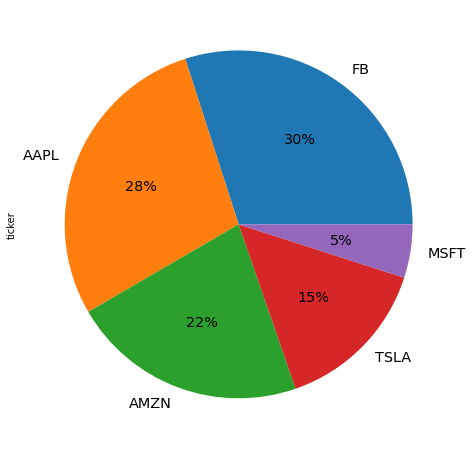

In [79]:
print(len(News))
print(News.groupby('ticker').count())

News.ticker.value_counts().plot(kind='pie', autopct='%1.0f%%', subplots=True,
                      figsize = (8,8), fontsize = 'x-large')

In [5]:
News.to_csv('Cloud')

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kozyr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

C:\Users\kozyr\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = analyser.polarity_scores(sent)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

In [9]:
News = News.drop(['time_good', 'CAR_perc'], axis = 1)

In [10]:
def score_sent_neg(article):
    scores = []
    sentences = article.split('.')

    for sentence in sentences:
        score = analyser.polarity_scores(sentence)
        scores.append(score)

    #Converting List of Dictionaries into Dataframe
    dataFrame= pd.DataFrame(scores)


    neg = dataFrame.mean()[0]
    return neg

def score_sent_neu(article):
    scores = []
    sentences = article.split('.')

    for sentence in sentences:
        score = analyser.polarity_scores(sentence)
        scores.append(score)

    #Converting List of Dictionaries into Dataframe
    dataFrame= pd.DataFrame(scores)


    neg = dataFrame.mean()[1]
    return neg

def score_sent_pos(article):
    scores = []
    sentences = article.split('.')

    for sentence in sentences:
        score = analyser.polarity_scores(sentence)
        scores.append(score)

    #Converting List of Dictionaries into Dataframe
    dataFrame= pd.DataFrame(scores)


    neg = dataFrame.mean()[2]
    return neg

In [11]:
News['Negative'] = News['Article'].astype(str).apply(score_sent_neg)
News['Neutral'] = News['Article'].astype(str).apply(score_sent_neu)
News['Positive'] = News['Article'].astype(str).apply(score_sent_pos)

In [12]:
def Sentiment(row):
    if row['Positive'] > 0.1 and row['Positive'] > row['Negative']:
        return 'Positive'
    elif row['Negative'] > 0.09:
        return 'Negative'
    else:
        return 'Neutral'

News['Sentiment'] = News.apply(Sentiment, axis = 1)

def Score(row):
    if row['Sentiment'] == 'Positive':
        return 1
    elif row['Sentiment'] == 'Negative':
        return -1
    else:
        return 0
News['Score'] = News.apply(Score, axis = 1)

In [13]:
News[['Article', 'Sentiment']].groupby('Sentiment').count()

,Article
Sentiment,
Negative,22
Neutral,492
Positive,68


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D6EF50ED30>],
      dtype=object)

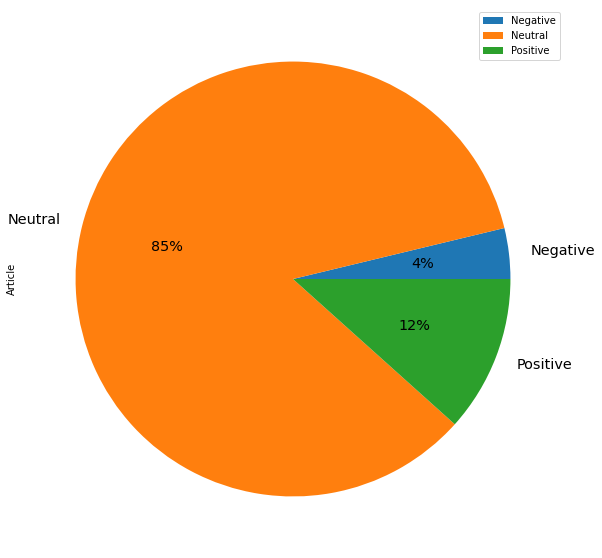

In [80]:
Number_per_class = News[['Article', 'Sentiment']].groupby('Sentiment').count()

Number_per_class.plot(kind='pie', autopct='%1.0f%%', subplots=True,
                      figsize = (10,10), fontsize = 'x-large')

In [15]:
Positive = News[News['Score'] == 1]
Negative = News[News['Score'] == -1]
Neutral = News[News['Score'] == 0]

In [16]:
CAAR_pos = Positive['CAR'].mean()
CAAR_neg = Negative['CAR'].mean()
CAAR_neu = Neutral['CAR'].mean()

In [17]:
print(CAAR_pos, CAAR_neg, CAAR_neu)

-9.069873856192004e-05 -0.0016789784277942898 -0.0002879843567684035


In [18]:
Positive.head()

,Article,ticker,time_tz,valid,start,end,CAR,hour,class,Negative,Neutral,Positive,Sentiment,Score
2,WASHINGTON (Reuters) - If Amazon.com decides t...,AMZN,2019-10-28 15:34:00-04:00,True,2019-10-28 14:34:00-04:00,2019-10-28 16:34:00-04:00,0.000605,14,NaN,0.033970,0.769364,0.105727,Positive,1
13,(Reuters) - Amazon.com Inc has launched an ini...,AMZN,2019-09-24 15:41:00-04:00,True,2019-09-24 14:41:00-04:00,2019-09-24 16:41:00-04:00,-0.002442,14,NaN,0.003846,0.772462,0.146769,Positive,1
16,"Reuters, the world’s largest multimedia news p...",AMZN,2019-09-19 10:16:00-04:00,True,2019-09-19 09:16:00-04:00,2019-09-19 11:16:00-04:00,0.002030,9,NaN,0.000000,0.863231,0.136769,Positive,1
17,"MANNHEIM, Germany (Reuters) - Amazon has begun...",AMZN,2019-09-17 12:53:00-04:00,True,2019-09-17 11:53:00-04:00,2019-09-17 13:53:00-04:00,0.001189,11,NaN,0.026250,0.795100,0.128600,Positive,1
19,WASHINGTON (Reuters) - Three U.S. senators on ...,AMZN,2019-09-12 12:24:00-04:00,True,2019-09-12 11:24:00-04:00,2019-09-12 13:24:00-04:00,-0.004299,11,NaN,0.034667,0.722133,0.109867,Positive,1


In [19]:
arr = pd.read_csv('arr')
params['AAPL'] = [float(arr['c1']), float(arr['a_R_t-1']), float(arr['a_R_m'])]

In [20]:
prices = pd.read_csv('prices', index_col = 0)
prices_AAPL = pd.read_csv('prices_model_AAPL', index_col = 0)

prices_AAPL = prices_AAPL[['time', 'R_t', 'R_t-1']]

prices_AAPL['R_t_AAPL'] = prices_AAPL['R_t']
prices_AAPL['R_t-1_AAPL'] = prices_AAPL['R_t-1']

prices = pd.merge(prices, prices_AAPL, on = 'time', how = 'inner', sort = False)
prices['time'] = pd.to_datetime(prices['time'])
prices.to_csv('prices_BERT')

In [21]:
Positive_CAR = [0] * 1440
N = len(Positive)

for _, row in Positive.iterrows():
    
    beg = row['start']
    end = row['end']
    news_time = row['time_tz']
    
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['diff'] = for_the_news['time'] - news_time
    
    for_the_news['diff'] = for_the_news['diff'].apply(lambda x: x.seconds)
    for_the_news['diff'] = for_the_news['diff'].apply(lambda seconds: (seconds//60))
    
    for_the_news['AR'] = for_the_news['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_news['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_news['R_m']
    for_the_news['cumAR'] = for_the_news['AR'].cumsum()
    
    for a, row1 in for_the_news.iterrows():
        Positive_CAR[row1['diff']] += row1['cumAR']/N

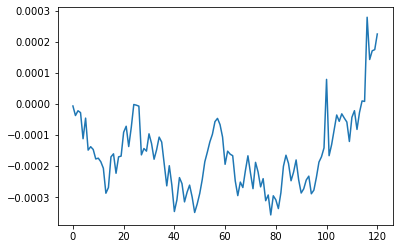

In [22]:
P_CAR = Positive_CAR[-60:] + Positive_CAR[:61]
plt.plot(P_CAR)

In [23]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

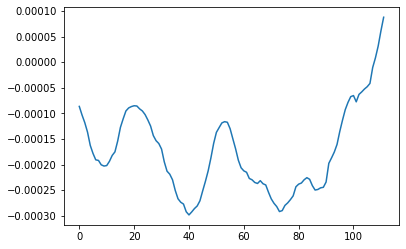

In [24]:
mean = running_mean(P_CAR, 10)
plt.plot(mean)

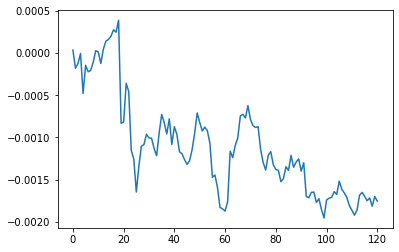

In [25]:
Negative_CAR = [0] * 1440
N = len(Negative)

for _, row in Negative.iterrows():
    
    beg = row['start']
    end = row['end']
    news_time = row['time_tz']
    
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['diff'] = for_the_news['time'] - news_time
    
    for_the_news['diff'] = for_the_news['diff'].apply(lambda x: x.seconds)
    for_the_news['diff'] = for_the_news['diff'].apply(lambda seconds: (seconds//60))
    
    for_the_news['AR'] = for_the_news['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_news['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_news['R_m']
    for_the_news['cumAR'] = for_the_news['AR'].cumsum()
    
    for a, row1 in for_the_news.iterrows():
        Negative_CAR[row1['diff']] += row1['cumAR']/N

N_CAR = Negative_CAR[-60:] + Negative_CAR[:61]
plt.plot(N_CAR)

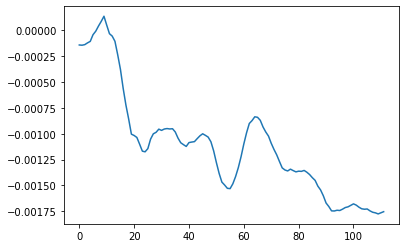

In [26]:
plt.plot(running_mean(N_CAR, 10))

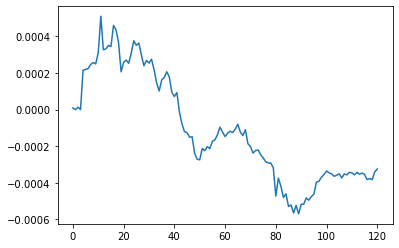

In [27]:
Neutral_CAR = [0] * 1440
N = len(Neutral)

for _, row in Neutral.iterrows():
    
    beg = row['start']
    end = row['end']
    news_time = row['time_tz']
    
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['diff'] = for_the_news['time'] - news_time
    
    for_the_news['diff'] = for_the_news['diff'].apply(lambda x: x.seconds)
    for_the_news['diff'] = for_the_news['diff'].apply(lambda seconds: (seconds//60))
    
    for_the_news['AR'] = for_the_news['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_news['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_news['R_m']
    for_the_news['cumAR'] = for_the_news['AR'].cumsum()
    
    for a, row1 in for_the_news.iterrows():
        Neutral_CAR[row1['diff']] += row1['cumAR']/N

Ne_CAR = Neutral_CAR[-60:] + Neutral_CAR[:61]
plt.plot(Ne_CAR)

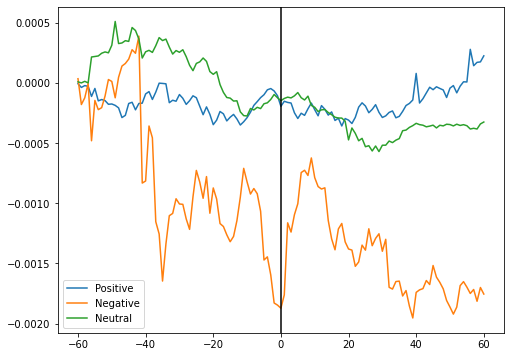

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(-60,60,len(P_CAR)), P_CAR, label = 'Positive')
plt.plot(np.linspace(-60,60,len(P_CAR)), N_CAR, label = 'Negative')
plt.plot(np.linspace(-60,60,len(P_CAR)), Ne_CAR, label = 'Neutral')
plt.axvline(x=0, color = 'black')
plt.legend()
plt.show()

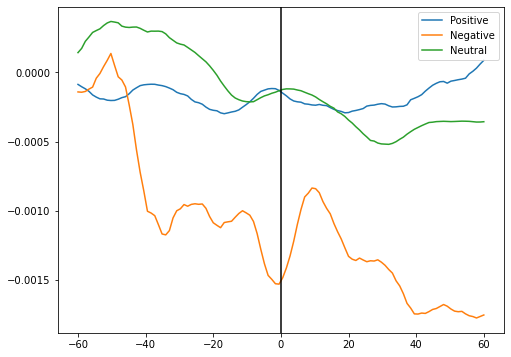

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(-60,60,len(running_mean(P_CAR, 10))),running_mean(P_CAR, 10), label = 'Positive')
plt.plot(np.linspace(-60,60,len(running_mean(P_CAR, 10))),running_mean(N_CAR, 10), label = 'Negative')
plt.plot(np.linspace(-60,60,len(running_mean(P_CAR, 10))),running_mean(Ne_CAR, 10), label = 'Neutral')
plt.axvline(x=0, color = 'black')
plt.legend()
plt.show()

In [30]:
Positive_vol = [0] * 1440
N = len(Positive)

for _, row in News.iterrows():
    
    beg = row['start'] - pd.Timedelta("20 min")
    end = row['end'] - pd.Timedelta("20 min")
    news_time = row['time_tz'] - pd.Timedelta("20 min")
    
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['diff'] = for_the_news['time'] - news_time
    
    for_the_news['diff'] = for_the_news['diff'].apply(lambda x: x.seconds)
    for_the_news['diff'] = for_the_news['diff'].apply(lambda seconds: (seconds//60))
    
    for_the_news['volume'] = for_the_news[row['ticker'] + '_vol']
    
    for a, row1 in for_the_news.iterrows():
        Positive_vol[row1['diff']] += row1['volume']/N

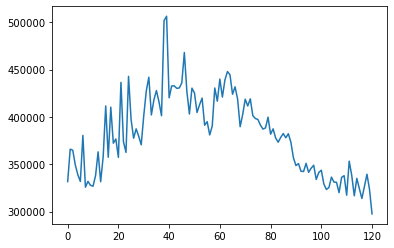

In [31]:
P_vol = Positive_vol[-60:] + Positive_vol[:61]
plt.plot(P_vol)
plt.show()

st = np.std(P_vol)

P_vol_low = np.array(P_vol) - 1.96 * st
P_vol_high = np.array(P_vol) + 1.96 * st

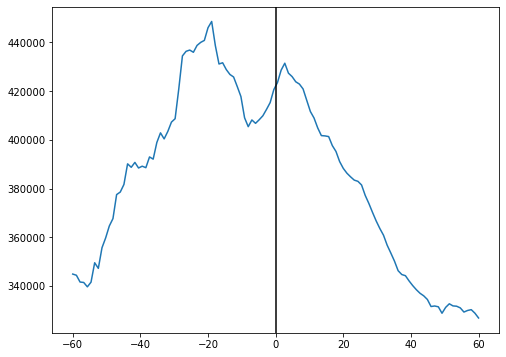

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(-60,60,len(running_mean(P_vol, 10))),running_mean(P_vol, 10))
plt.axvline(x=0, color = 'black')
plt.show()

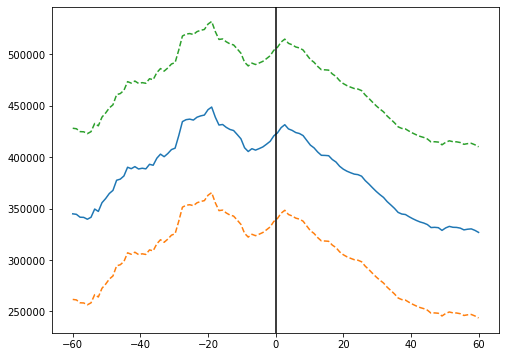

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(-60,60,len(running_mean(P_vol, 10))),running_mean(P_vol, 10))
plt.plot(np.linspace(-60,60,len(running_mean(P_vol, 10))),running_mean(P_vol_low, 10), '--')
plt.plot(np.linspace(-60,60,len(running_mean(P_vol, 10))),running_mean(P_vol_high, 10), '--')
plt.axvline(x=0, color = 'black')
plt.show()

In [34]:
prices.head()

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol,...,R_t_MSFT,R_t-1_MSFT,R_t_FB,R_t-1_FB,R_t_TSLA,R_t-1_TSLA,R_t,R_t-1,R_t_AAPL,R_t-1_AAPL
0,2019-01-02 09:32:00-05:00,2473.56,2473.56,2471.44,2471.26,155.18,155.3,154.77,154.8073,155007,...,0.002626,-0.005424,0.002697,0.005969,0.010285,-0.001408,0.002520,-0.000646,0.002520,-0.000646
1,2019-01-02 09:33:00-05:00,2471.30,2472.88,2471.67,2469.64,154.83,154.9,154.58,154.6700,170003,...,-0.000544,0.002626,0.002912,0.002697,-0.005478,0.010285,-0.002255,0.002520,-0.002255,0.002520
2,2019-01-02 09:34:00-05:00,2471.88,2472.49,2471.04,2470.11,154.63,155.0,154.62,154.7500,146408,...,0.001293,-0.000544,0.000200,0.002912,-0.006825,-0.005478,-0.001292,-0.002255,-0.001292,-0.002255
3,2019-01-02 09:35:00-05:00,2471.06,2471.32,2468.78,2467.47,154.78,154.8,154.30,154.5300,218226,...,0.000661,0.001293,0.001341,0.000200,-0.003262,-0.006825,0.000970,-0.001292,0.000970,-0.001292
4,2019-01-02 09:36:00-05:00,2468.84,2471.80,2471.80,2468.84,154.51,155.0,154.49,154.9590,179486,...,-0.000704,0.000661,-0.001683,0.001341,-0.009069,-0.003262,-0.001744,0.000970,-0.001744,0.000970


In [35]:
prices_AAPL = prices[['time', 'R_t_AAPL', 'R_t-1_AAPL', 'R_m']]

In [36]:
y = prices_AAPL['R_t_AAPL']
X = sm.add_constant(prices_AAPL[['R_t-1_AAPL', 'R_m']])

In [37]:
mod_normal_ret = sm.OLS(y, X)

res = mod_normal_ret.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               R_t_AAPL   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.416e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        18:09:17   Log-Likelihood:             4.9446e+05
No. Observations:               83442   AIC:                        -9.889e+05
Df Residuals:                   83439   BIC:                        -9.889e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.213e-06   2.24e-06      0.989      0.3

In [38]:
promezh = pd.DataFrame({'time': [], 'Score': []})
for _, row in News[News['ticker'] == 'AAPL'].iterrows():
    
    beg = row['time_tz'] - pd.Timedelta("30 min")
    end = row['end']
    news_time = row['time_tz']
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['Score'] = [row['Score']]*len(for_the_news)
    promezh = pd.concat([promezh, for_the_news[['time', 'Score']]], axis=0)
    promezh.drop_duplicates(subset=['time'])


In [39]:
prices_AAPL = pd.merge(prices_AAPL, promezh, on = 'time')

In [40]:
prices_AAPL.head()

,time,R_t_AAPL,R_t-1_AAPL,R_m,Score
0,2019-01-02 09:45:00-05:00,0.000872,0.001520,0.000295,0.0
1,2019-01-02 09:46:00-05:00,0.000465,0.000872,0.001058,0.0
2,2019-01-02 09:47:00-05:00,-0.000787,0.000465,-0.000605,0.0
3,2019-01-02 09:48:00-05:00,-0.000355,-0.000787,0.000981,0.0
4,2019-01-02 09:49:00-05:00,-0.001356,-0.000355,-0.000597,0.0


In [41]:
def pos(row):
    if row['Score'] == 1:
        return 1
    else:
        return 0
    
def neg(row):
    if row['Score'] == -1:
        return 1
    else:
        return 0

prices_AAPL['Positive'] = prices_AAPL.apply(pos, axis = 1)
prices_AAPL['Negative'] = prices_AAPL.apply(neg, axis = 1)

In [42]:
y = prices_AAPL['R_t_AAPL']
X = sm.add_constant(prices_AAPL[['R_t-1_AAPL', 'R_m', 'Positive', 'Negative']])

In [43]:
mod_normal_ret = sm.OLS(y, X)

res = mod_normal_ret.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               R_t_AAPL   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     2435.
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        18:09:32   Log-Likelihood:                 86612.
No. Observations:               14245   AIC:                        -1.732e+05
Df Residuals:                   14240   BIC:                        -1.732e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.525e-06   4.78e-06     -0.528      0.5

In [44]:
prices

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol,...,R_t_MSFT,R_t-1_MSFT,R_t_FB,R_t-1_FB,R_t_TSLA,R_t-1_TSLA,R_t,R_t-1,R_t_AAPL,R_t-1_AAPL
0,2019-01-02 09:32:00-05:00,2473.56,2473.56,2471.44,2471.26,155.18,155.30,154.77,154.8073,155007,...,0.002626,-0.005424,0.002697,0.005969,0.010285,-0.001408,0.002520,-0.000646,0.002520,-0.000646
1,2019-01-02 09:33:00-05:00,2471.30,2472.88,2471.67,2469.64,154.83,154.90,154.58,154.6700,170003,...,-0.000544,0.002626,0.002912,0.002697,-0.005478,0.010285,-0.002255,0.002520,-0.002255,0.002520
2,2019-01-02 09:34:00-05:00,2471.88,2472.49,2471.04,2470.11,154.63,155.00,154.62,154.7500,146408,...,0.001293,-0.000544,0.000200,0.002912,-0.006825,-0.005478,-0.001292,-0.002255,-0.001292,-0.002255
3,2019-01-02 09:35:00-05:00,2471.06,2471.32,2468.78,2467.47,154.78,154.80,154.30,154.5300,218226,...,0.000661,0.001293,0.001341,0.000200,-0.003262,-0.006825,0.000970,-0.001292,0.000970,-0.001292
4,2019-01-02 09:36:00-05:00,2468.84,2471.80,2471.80,2468.84,154.51,155.00,154.49,154.9590,179486,...,-0.000704,0.000661,-0.001683,0.001341,-0.009069,-0.003262,-0.001744,0.000970,-0.001744,0.000970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83437,2019-11-08 15:55:00-05:00,3090.65,3090.80,3090.69,3089.99,259.97,260.44,259.91,259.9216,265226,...,0.000480,0.000069,0.001104,0.000079,0.000178,0.000862,-0.000038,0.000346,-0.000038,0.000346
83438,2019-11-08 15:56:00-05:00,3090.70,3090.76,3090.73,3090.05,259.92,259.98,259.88,259.9150,95948,...,-0.000651,0.000480,-0.000026,0.001104,0.000357,0.000178,-0.000192,-0.000038,-0.000192,-0.000038
83439,2019-11-08 15:57:00-05:00,3090.74,3091.02,3090.69,3090.52,259.92,259.95,259.80,259.8200,93800,...,0.000034,-0.000651,0.000236,-0.000026,0.000475,0.000357,0.000000,-0.000192,0.000000,-0.000192
83440,2019-11-08 15:58:00-05:00,3090.70,3091.13,3091.02,3090.58,259.82,259.89,259.80,259.8800,112397,...,0.000137,0.000034,-0.000262,0.000236,-0.000089,0.000475,-0.000385,0.000000,-0.000385,0.000000


In [45]:
len(Negative)

22

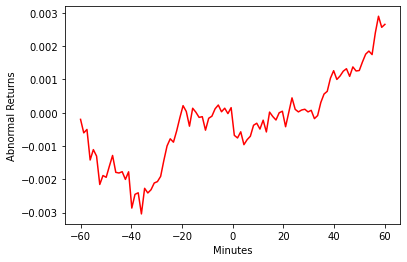

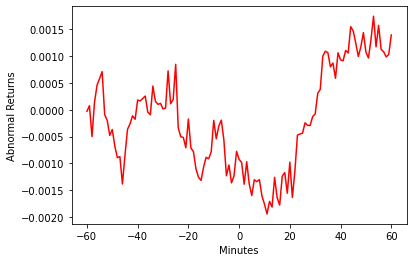

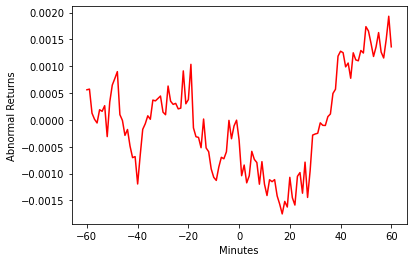

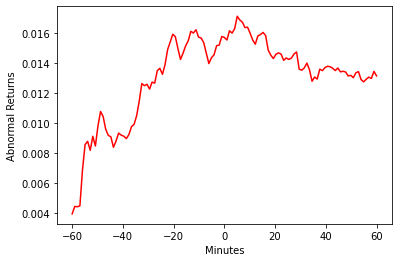

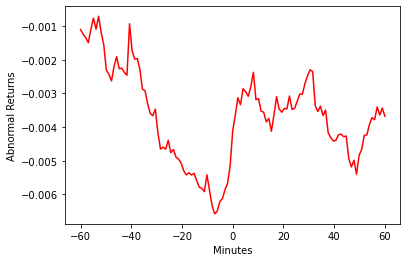

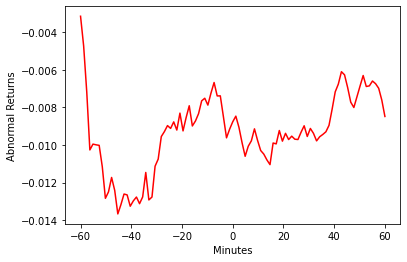

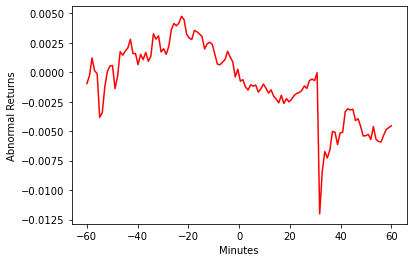

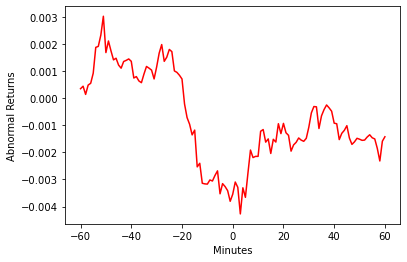

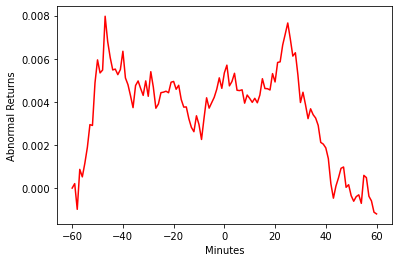

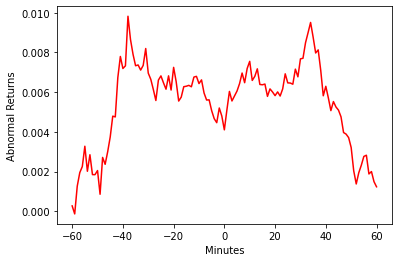

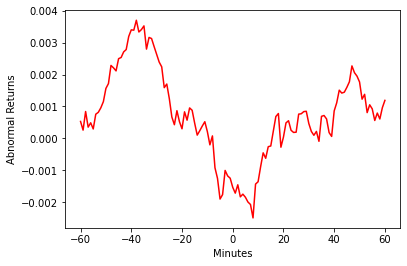

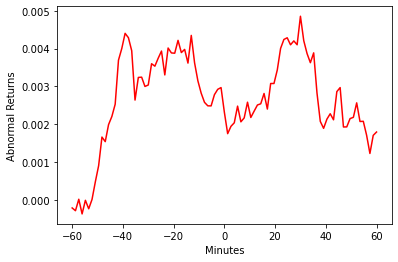

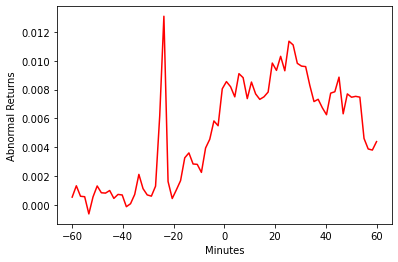

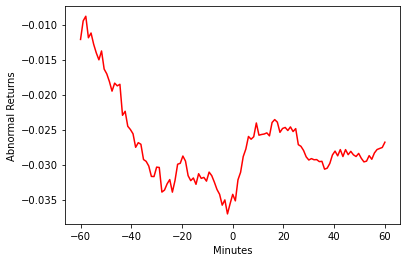

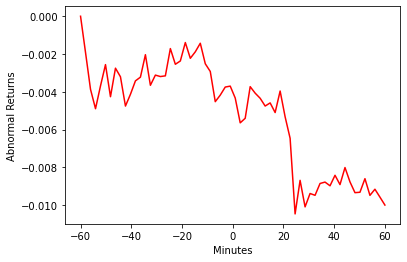

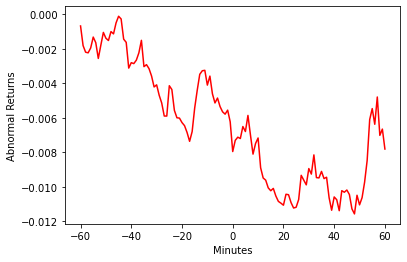

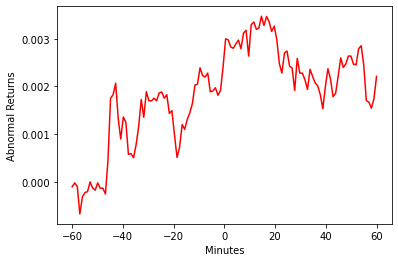

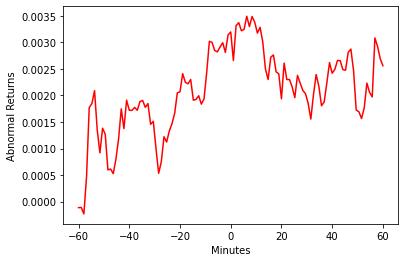

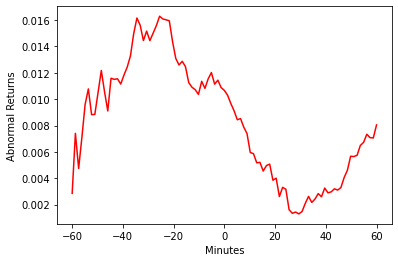

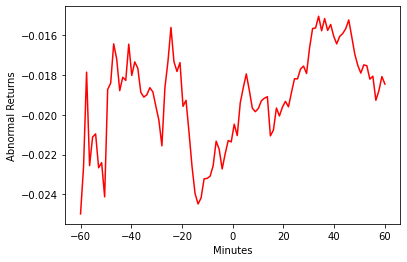

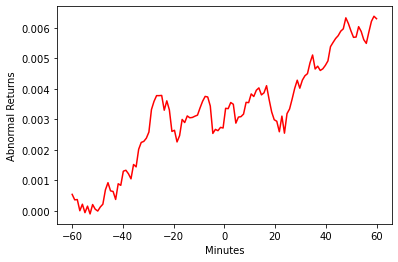

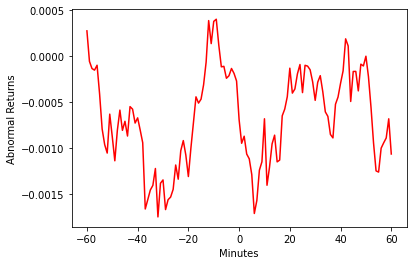

In [46]:
for _, row in Negative.iterrows():
    
    beg_small = row['start']
    end_small = row['end']
    news_time_small = row['time_tz']
    
    for_the_small = prices[(prices['time'] >= beg_small) & (prices['time'] <= end_small)].copy()
    for_the_small['diff'] = for_the_small['time'] - news_time_small

    for_the_small['AR'] = for_the_small['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_small['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_small['R_m']
    for_the_small['cumAR'] = for_the_small['AR'].cumsum()

    plt.plot(np.linspace(-60,60,len(for_the_small['cumAR'])), for_the_small['cumAR'], color = 'r')
    plt.ylabel('Abnormal Returns')
    plt.xlabel('Minutes')
    plt.show()

In [47]:
Negative = Negative.drop([386])

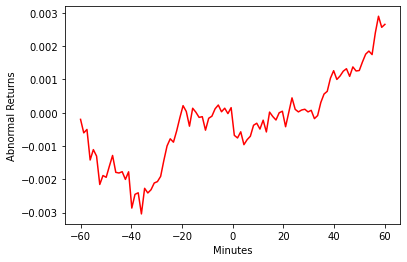

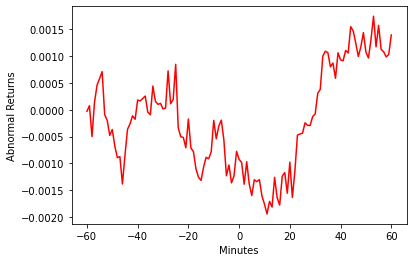

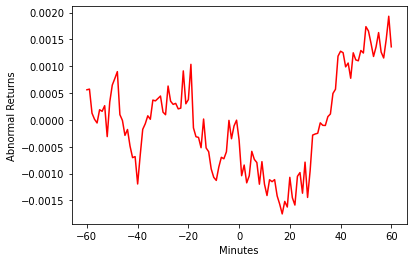

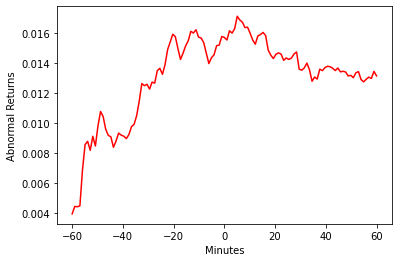

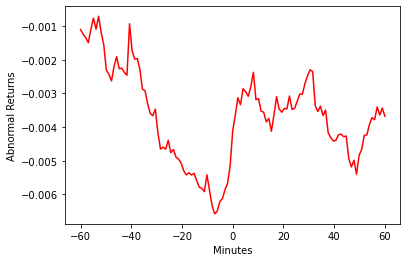

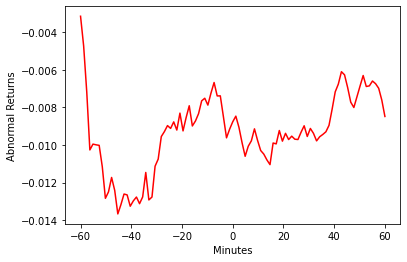

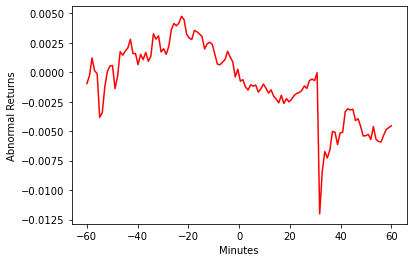

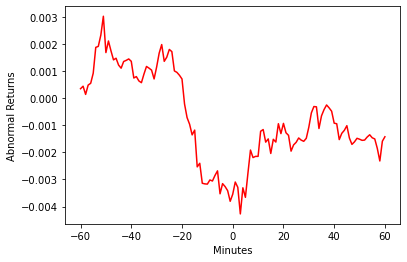

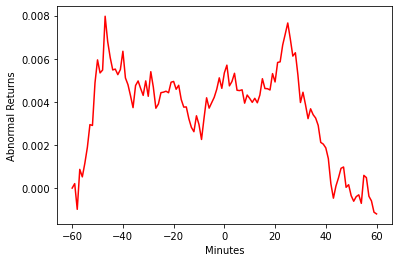

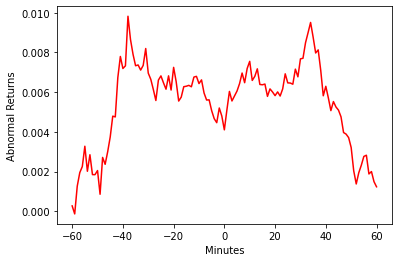

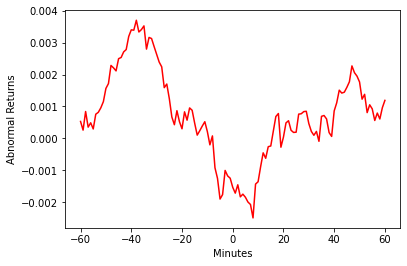

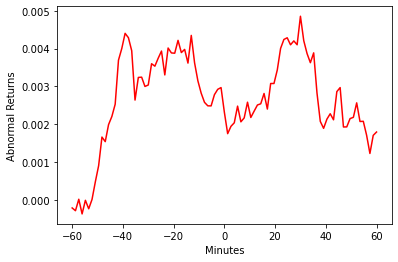

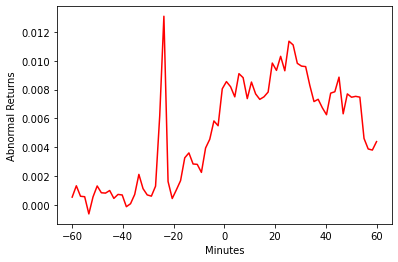

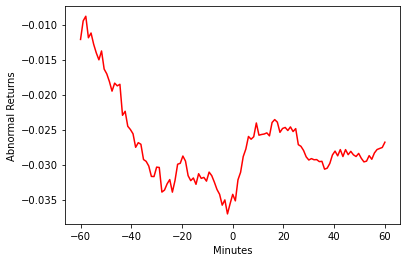

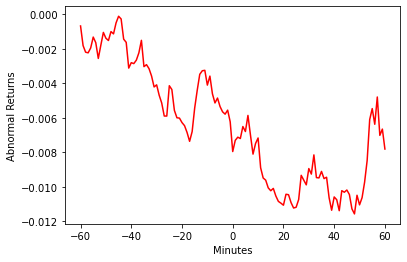

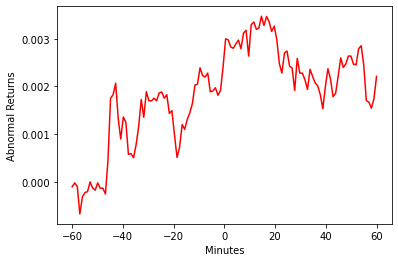

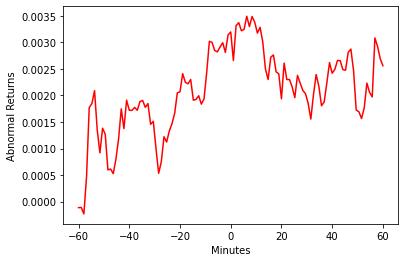

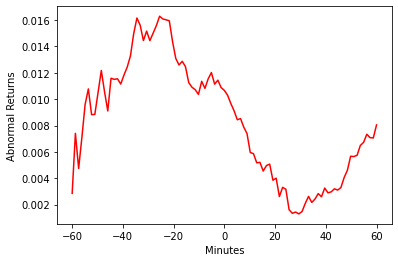

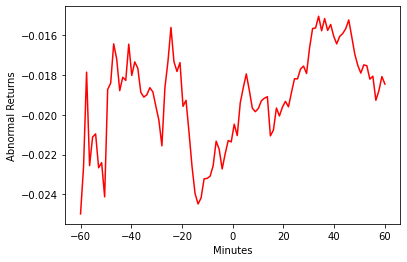

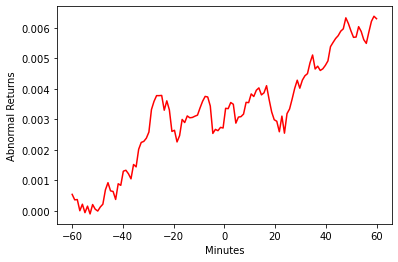

In [48]:
for _, row in Negative.iterrows():
    
    beg_small = row['start']
    end_small = row['end']
    news_time_small = row['time_tz']
    
    for_the_small = prices[(prices['time'] >= beg_small) & (prices['time'] <= end_small)].copy()
    for_the_small['diff'] = for_the_small['time'] - news_time_small

    for_the_small['AR'] = for_the_small['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_small['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_small['R_m']
    for_the_small['cumAR'] = for_the_small['AR'].cumsum()

    plt.plot(np.linspace(-60,60,len(for_the_small['cumAR'])), for_the_small['cumAR'], color = 'r')
    plt.ylabel('Abnormal Returns')
    plt.xlabel('Minutes')
    plt.show()

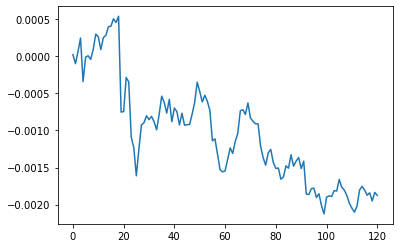

In [49]:
Negative_CAR = [0] * 1440
N = len(Negative)

for _, row in Negative.iterrows():
    
    beg = row['start']
    end = row['end']
    news_time = row['time_tz']
    
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['diff'] = for_the_news['time'] - news_time
    
    for_the_news['diff'] = for_the_news['diff'].apply(lambda x: x.seconds)
    for_the_news['diff'] = for_the_news['diff'].apply(lambda seconds: (seconds//60))
    
    for_the_news['AR'] = for_the_news['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_news['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_news['R_m']
    for_the_news['cumAR'] = for_the_news['AR'].cumsum()
    
    for a, row1 in for_the_news.iterrows():
        Negative_CAR[row1['diff']] += row1['cumAR']/N

N_CAR = Negative_CAR[-60:] + Negative_CAR[:61]
plt.plot(N_CAR)

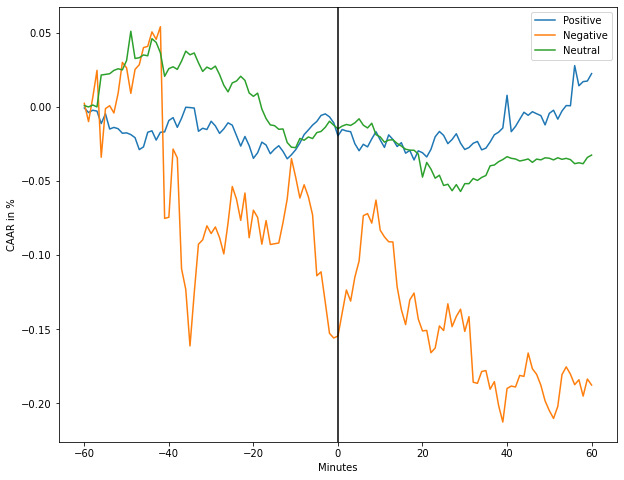

In [50]:
plt.figure(figsize=(10, 8))
plt.plot(np.linspace(-60,60,len(P_CAR)), np.array(P_CAR)*100, label = 'Positive')
plt.plot(np.linspace(-60,60,len(P_CAR)), np.array(N_CAR)*100, label = 'Negative')
plt.plot(np.linspace(-60,60,len(P_CAR)), np.array(Ne_CAR)*100, label = 'Neutral')
plt.axvline(x=0, color = 'black')
plt.legend()
plt.tick_params(left='off')
plt.xlabel("Minutes")
plt.ylabel("CAAR in %")
plt.show()

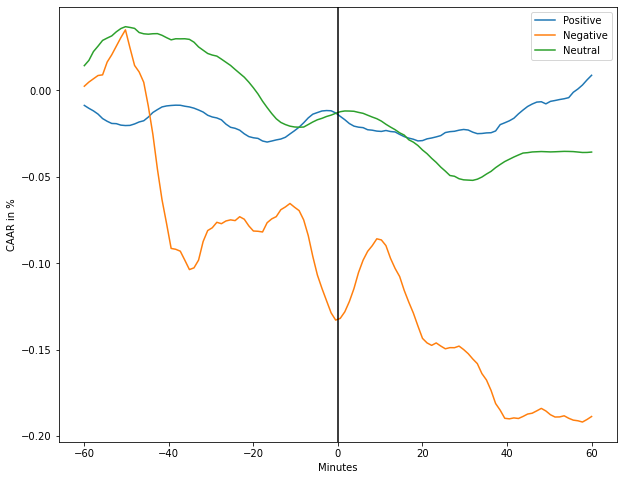

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(np.linspace(-60,60,len(running_mean(P_CAR, 10))),running_mean(np.array(P_CAR)*100, 10), label = 'Positive')
plt.plot(np.linspace(-60,60,len(running_mean(P_CAR, 10))),running_mean(np.array(N_CAR)*100, 10), label = 'Negative')
plt.plot(np.linspace(-60,60,len(running_mean(P_CAR, 10))),running_mean(np.array(Ne_CAR)*100, 10), label = 'Neutral')
plt.axvline(x=0, color = 'black')
plt.legend()
plt.tick_params(left='off')
plt.xlabel("Minutes")
plt.ylabel("CAAR in %")
plt.show()

In [53]:
News[['ticker', 'valid', 'Negative', 'Neutral', 'Positive']].groupby('ticker').apply(lambda column: (column != 0).sum()).to_excel('descriptive.xlsx')

In [54]:
News[['ticker', 'Article', 'Sentiment']].groupby(['ticker','Sentiment']).count()

Article
ticker Sentiment         
AAPL   Negative         6
       Neutral        156
       Positive         3
AMZN   Negative         3
       Neutral         75
       Positive        50
FB     Negative         8
       Neutral        160
       Positive         7
MSFT   Negative         1
       Neutral         23
       Positive         5
TSLA   Negative         4
       Neutral         78
       Positive         3

In [55]:
News['Article'] = News['Article'].astype('str')
News['Words'] = News['Article'].apply(lambda x: len(x.split()))

In [56]:
News[['ticker', 'Words']].groupby(['ticker']).mean()

,Words
ticker,
AAPL,350.993976
AMZN,336.742188
FB,307.600000
MSFT,365.103448
TSLA,327.279070


In [57]:
News['Words'].mean()

332.0753424657534

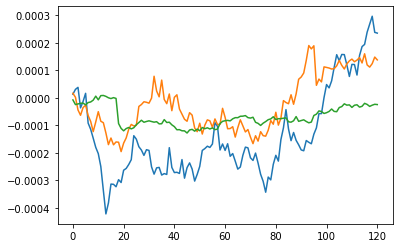

In [58]:
Positive_CAR = [0] * 1440
N = len(Positive)

for _, row in Positive[Positive['ticker'] == 'AMZN'].iterrows():
    
    beg = row['start']
    end = row['end']
    news_time = row['time_tz']
    
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['diff'] = for_the_news['time'] - news_time
    
    for_the_news['diff'] = for_the_news['diff'].apply(lambda x: x.seconds)
    for_the_news['diff'] = for_the_news['diff'].apply(lambda seconds: (seconds//60))
    
    for_the_news['AR'] = for_the_news['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_news['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_news['R_m']
    for_the_news['cumAR'] = for_the_news['AR'].cumsum()
    
    for a, row1 in for_the_news.iterrows():
        Positive_CAR[row1['diff']] += row1['cumAR']/N
        
P_CAR = Positive_CAR[-60:] + Positive_CAR[:61]
plt.plot(P_CAR)

Negative_CAR = [0] * 1440
N = len(Negative)

for _, row in Negative[Negative['ticker'] == 'AMZN'].iterrows():
    
    beg = row['start']
    end = row['end']
    news_time = row['time_tz']
    
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['diff'] = for_the_news['time'] - news_time
    
    for_the_news['diff'] = for_the_news['diff'].apply(lambda x: x.seconds)
    for_the_news['diff'] = for_the_news['diff'].apply(lambda seconds: (seconds//60))
    
    for_the_news['AR'] = for_the_news['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_news['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_news['R_m']
    for_the_news['cumAR'] = for_the_news['AR'].cumsum()
    
    for a, row1 in for_the_news.iterrows():
        Negative_CAR[row1['diff']] += row1['cumAR']/N

N_CAR = Negative_CAR[-60:] + Negative_CAR[:61]
plt.plot(N_CAR)

Neutral_CAR = [0] * 1440
N = len(Neutral)

for _, row in Neutral[Neutral['ticker'] == 'AMZN'].iterrows():
    
    beg = row['start']
    end = row['end']
    news_time = row['time_tz']
    
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['diff'] = for_the_news['time'] - news_time
    
    for_the_news['diff'] = for_the_news['diff'].apply(lambda x: x.seconds)
    for_the_news['diff'] = for_the_news['diff'].apply(lambda seconds: (seconds//60))
    
    for_the_news['AR'] = for_the_news['R_t_' + row['ticker']] - params[row['ticker']][0] - params[row['ticker']][1] * for_the_news['R_t-1_' + row['ticker']] - params[row['ticker']][2] * for_the_news['R_m']
    for_the_news['cumAR'] = for_the_news['AR'].cumsum()
    
    for a, row1 in for_the_news.iterrows():
        Neutral_CAR[row1['diff']] += row1['cumAR']/N

Ne_CAR = Neutral_CAR[-60:] + Neutral_CAR[:61]
plt.plot(Ne_CAR)

In [68]:
News.to_csv('News_proper')

In [69]:
prices_AAPL.to_csv(r'C:\Users\kozyr\Downloads\prices_Apple_AR')

In [70]:
prices_AMZN = prices[['time', 'R_t_AMZN', 'R_t-1_AMZN', 'R_m']]

In [71]:
promezh = pd.DataFrame({'time': [], 'Score': []})
for _, row in News[News['ticker'] == 'AMZN'].iterrows():
    
    beg = row['time_tz'] - pd.Timedelta("30 min")
    end = row['end']
    news_time = row['time_tz']
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['Score'] = [row['Score']]*len(for_the_news)
    promezh = pd.concat([promezh, for_the_news[['time', 'Score']]], axis=0)
    promezh.drop_duplicates(subset=['time'])


prices_AMZN = pd.merge(prices_AMZN, promezh, on = 'time', how = 'left')

prices_AMZN['Positive'] = prices_AMZN.apply(pos, axis = 1)
prices_AMZN['Negative'] = prices_AMZN.apply(neg, axis = 1)

In [72]:
prices_AMZN.to_csv(r'C:\Users\kozyr\Downloads\prices_AMZN_AR.csv')

In [73]:
prices_AMZN.groupby('Score').count()

,time,R_t_AMZN,R_t-1_AMZN,R_m,Positive,Negative
Score,,,,,,
-1.0,248,248,248,248,248,248
0.0,6087,6087,6087,6087,6087,6087
1.0,4228,4228,4228,4228,4228,4228


In [74]:
prices_FB = prices[['time', 'R_t_FB', 'R_t-1_FB', 'R_m']]

promezh = pd.DataFrame({'time': [], 'Score': []})
for _, row in News[News['ticker'] == 'FB'].iterrows():
    
    beg = row['time_tz'] - pd.Timedelta("30 min")
    end = row['end']
    news_time = row['time_tz']
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['Score'] = [row['Score']]*len(for_the_news)
    promezh = pd.concat([promezh, for_the_news[['time', 'Score']]], axis=0)
    promezh.drop_duplicates(subset=['time'])


prices_FB = pd.merge(prices_FB, promezh, on = 'time', how = 'left')

prices_FB['Positive'] = prices_FB.apply(pos, axis = 1)
prices_FB['Negative'] = prices_FB.apply(neg, axis = 1)

prices_FB.to_csv(r'C:\Users\kozyr\Downloads\prices_FB_AR.csv')

In [75]:
prices_TSLA = prices[['time', 'R_t_TSLA', 'R_t-1_TSLA', 'R_m']]

promezh = pd.DataFrame({'time': [], 'Score': []})
for _, row in News[News['ticker'] == 'TSLA'].iterrows():
    
    beg = row['time_tz'] - pd.Timedelta("30 min")
    end = row['end']
    news_time = row['time_tz']
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['Score'] = [row['Score']]*len(for_the_news)
    promezh = pd.concat([promezh, for_the_news[['time', 'Score']]], axis=0)
    promezh.drop_duplicates(subset=['time'])


prices_TSLA = pd.merge(prices_TSLA, promezh, on = 'time', how = 'left')

prices_TSLA['Positive'] = prices_TSLA.apply(pos, axis = 1)
prices_TSLA['Negative'] = prices_TSLA.apply(neg, axis = 1)

prices_TSLA.to_csv(r'C:\Users\kozyr\Downloads\prices_TSLA_AR.csv')

In [76]:
prices_MSFT = prices[['time', 'R_t_MSFT', 'R_t-1_MSFT', 'R_m']]

promezh = pd.DataFrame({'time': [], 'Score': []})
for _, row in News[News['ticker'] == 'MSFT'].iterrows():
    
    beg = row['time_tz'] - pd.Timedelta("30 min")
    end = row['end']
    news_time = row['time_tz']
    for_the_news = prices[(prices['time'] >= beg) & (prices['time'] <= end)].copy()
    for_the_news['Score'] = [row['Score']]*len(for_the_news)
    promezh = pd.concat([promezh, for_the_news[['time', 'Score']]], axis=0)
    promezh.drop_duplicates(subset=['time'])


prices_MSFT = pd.merge(prices_MSFT, promezh, on = 'time', how = 'left')

prices_MSFT['Positive'] = prices_MSFT.apply(pos, axis = 1)
prices_MSFT['Negative'] = prices_MSFT.apply(neg, axis = 1)

prices_MSFT.to_csv(r'C:\Users\kozyr\Downloads\prices_MSFT_AR.csv')

In [81]:
from scipy import stats

In [83]:
Negative['CAR'].

87     0.002656
110    0.001393
111    0.001361
142    0.013145
165   -0.003681
190   -0.008482
220   -0.004544
259   -0.001419
270   -0.001202
271    0.001237
303    0.001189
326    0.001798
365    0.004398
371   -0.026799
387   -0.007818
48     0.001994
49     0.002559
230    0.008043
243   -0.018456
279    0.006753
Name: CAR, dtype: float64

In [89]:
stats.ttest_1samp(Negative['CAR'],0)

Ttest_1sampResult(statistic=-0.6455084633126621, pvalue=0.5263171542011337)